# Projeto de Ci√™ncias de Dados

##### Professor: Francisco Rodrigues
##### Aluna: Andressa Contarato Rodrigues

O desenvolvimento desse projeto se dar√° atrav√©s dos seguintes passos:
    
    * Pr√©-processamento
    
    1- Formula√ß√£o do problema e preparo dos dados
    2 - Limpeza e normaliza√ß√£o dos dados
    3- Transforma√ß√£o para valores num√©ricos (one-hot-encoding) se precisar.
    
    * Classifica√ß√£o (classificar de acordo com a qualidade)
    
    4 - kvizinhos (encontre o melhor k usando valida√ß√£o cruzada)
    5 - √Årvore de decis√£o
    6 - Naive Bayes
    7 - SVM (encontre o melhor C usando valida√ß√£o cruzada)
    8 - Random Forest (encontre o melhor n√∫mero de estimadores usando valida√ß√£o cruzada)
    
    * Ordena√ß√£o dos atributos
    
    9 - Para o algoritmo random forest, mostre a import√¢ncia de cada atributo.
    
    * Regress√£o
    
    10 - Usando regress√£o linear, tente predizer a porcentagem de √°lcool.
    11 - Compare os m√©todos Lasso, Ridge Regression, calculando o erro quadr√°tico m√©dio em fun√ß√£o dos seus par√¢metros (alpha).
    
    * Conclus√£o
    
    12 - Discuss√£o dos resultados obtidos

<span style="color:yellow"> Objetivo: Vamos considerar o problema de classifica√ß√£o dos de vinhos dispon√≠vel no portal Kaggle (link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
Ou seja, objetivamos construir um projeto para classificar os dados e posterior submiss√£o, de modo a verificar o qu√£o preciso s√£o nossos resultados comparados com solu√ß√µes de outros usu√°rios. 
Vamos mostrar todas as fases do projeto e os resultados, mas lembramos que essa √© uma poss√≠vel solu√ß√£o. </span>

Nosso objetivo √© classificar o vinho de acordo com a qualidade dele

## Formula√ß√£o do problema e leitura dos dados

Vamos considerar a base de dados de vinhos.

Atributos contidos nos dados

1 - fixed acidity: a maioria dos √°cidos envolvidos no vinho ou fixa ou n√£o vol√°til (n√£o evapore rapidamente) 

2 - volatile acidity: a quantidade de √°cido ac√©tico no vinho, que em n√≠veis muito altos pode levar a um sabor desagrad√°vel ao vinagre 

3 - citric acid: encontrado em pequenas quantidades, o √°cido c√≠trico pode adicionar 'frescura' e sabor aos vinhos

4 - residual sugar: a quantidade de a√ß√∫car restante ap√≥s o t√©rmino da fermenta√ß√£o, √© raro encontrar vinhos com menos de 1 grama / litro e vinhos com mais de 45 gramas / litro s√£o considerados doces 

5 - chlorides: a quantidade de sal no vinho 

6 - free sulfur dioxide: a forma livre de SO2 existe em equil√≠brio entre o SO2 molecular (como um g√°s dissolvido) e o √≠on bissulfito; impede o crescimento microbiano e a oxida√ß√£o do vinho 

7 - total sulfur dioxide: formas livres e ligadas de S02; em baixas concentra√ß√µes, o SO2 √© principalmente indetect√°vel no vinho, mas em concentra√ß√µes livres de SO2 acima de 50 ppm, o SO2 se torna evidente no nariz e no sabor do vinho 

8 - density: a densidade da √°gua no vinho √© pr√≥xima √† da √°gua, dependendo da porcentagem de teor de √°lcool e a√ß√∫car 

9 - pH: descreve como um vinho √© √°cido ou b√°sico em uma escala de 0 (muito √°cido) a 14 (muito b√°sico); a maioria dos vinhos tem entre 3-4 na escala de pH 

10 - sulphates: um aditivo de vinho que pode contribuir para os n√≠veis de g√°s di√≥xido de enxofre (S02), que atua como antimicrobiano e antioxidante 

11 - alcohol: a percentagem de √°lcool do vinho 

12 - quality: vari√°vel de sa√≠da de qualidade (com base em dados sensoriais, pontua√ß√£o entre 0 e 10)

Importando os pacotes necess√°rios

In [52]:
# Dentro da linguagem pandas ha v√°rios m√©todos e fun√ß√µes pr√©-definidas, por√©m muitas das quais vamos utilizar aqui, 
# temos que 'chamar' atrav√©s de uma estrutura import ou se for um m√≥dulo 
# de uma biblioteca, atrav√©s do from.

import matplotlib.pyplot as plt # m√≥dulo matplotlib para construcao de graficos
import numpy as np # biblioteca pandas usada para manipula√ß√£o de dados, tb da forma big data e constru√ß√£o de m√©tricas
import os # biblioteca python para setar egerenciar arquivos localmente
import pandas as pd # biblioteca Pandas √© usada para manipula√ß√£o de dados
import random # m√≥dulo do Numpy de gera√ß√£o de n√∫meros randomicos
from sklearn.preprocessing import StandardScaler # m√≥dulo do sklearn para padroniza√ß√£o dos dados do sklearn para padronizacao e normalizacao dos dados
from sklearn.model_selection import train_test_split # m√≥dulo do sklearn para separar dados de teste e de treino
from sklearn.model_selection import cross_validate # m√≥dulo sklearn para valida√ß√£o cruzada
from sklearn.neighbors import KNeighborsClassifier # m√≥dulo sklearn para calcular o modelo de machine learning knn
from sklearn import tree # importando o m√≥dulo do sklearn do modelo de √°rvore de decis√£o
from sklearn.metrics import accuracy_score # para calculo da acur√°cia em m√≥dulos que nao se tem implementados
from sklearn import tree # importando m√≥dulo de visualiza√ß√£o da √°rvore
from sklearn.naive_bayes import GaussianNB # m√≥dulo do sklearn para implementa√ß√£o do modelo de Naive Bayes com distribui√ß√£o normal
from sklearn import metrics # m√≥dulo do sklearn para computa√ß√£o de m√©tricas dentro do modelo de naive bayes
from sklearn.naive_bayes import BernoulliNB # m√≥dulo do sklearn para implementa√ß√£o do modelo de Naive Bayes com distribui√ß√£o bernoulli
from sklearn.ensemble import RandomForestClassifier # m√≥dulo do sklearn para constru√ß√£o do modelo de Random Forest
from sklearn.linear_model import LinearRegression # m√≥dulo sklearn para regressao linear
from sklearn.decomposition import PCA # m√≥dulo sklearn para constru√ß√£o da pca
from sklearn.model_selection import train_test_split # m√≥dulo sklearn para construcao do split para dataset de teste e de treino num modelo de regressao linear
from sklearn.linear_model import Lasso # m√≥dulo sklearn para importacao da m√©trica de lasso
from sklearn.metrics import mean_squared_error # m√≥dulo sklear para importacao da estatistica de teste erro quadr√°tico m√©dio
from sklearn.metrics import r2_score # m√≥dulo sklear para importacao da estatistica de teste R2
from sklearn.linear_model import Ridge, RidgeCV # m√≥dulo sklearn para importacao da m√©trica de ridge


1- Formula√ß√£o do problema e preparo dos dados

In [2]:
random.seed(42) # define a semente (importante para reproduzir os resultados)

dir_file = '/home/andressa/Desktop/' # criando um objeto do meu diretorio do dataset
os.chdir(dir_file) # setando aonde meu dataset est√°
df = pd.read_csv('winequality-red.csv') # importando os dados

print("N√∫mero de linhas e colunas no dataset:", df.shape) # funcao de printar
attributes = list(df.columns) # construindo um objeto tipo lista para armazenar os nomes das variaveis
features_names = df.columns
df.head(10) # funcao head para mostrar uma amostra do dataset

N√∫mero de linhas e colunas no dataset: (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [3]:
# criando uma variavel categorica
qualidade = []
for i in range(0,df.shape[0]):
    if df.iloc[i,11] <= 4:
        qualidade.append(0)
    else:
        qualidade.append(1)
df['qualidade'] = qualidade
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  qualidade  
0      9.4        5          1  
1      9.8        5          1  
2      9.8        5          1  
3      9.8        6          1  
4      9.4        5          1

2 - Limpeza e normaliza√ß√£o dos dados

O conjunto de dados pode apresentar valores nulos (not a number: nan). A sua identifica√ß√£o pode ser feita usando m√©todos da biblioteca Pandas.

In [4]:
df.isnull().sum().sort_values(ascending=False).head(10)

qualidade               0
quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
dtype: int64

In [5]:
df = df.dropna() # reomo√ß√£o de valores faltantes

N√£o apresenta nenhum valor faltante

In [6]:
# Retorna True na posi√ß√£o em que h√° uma linha duplicada
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

Apresenta valor duplicado

In [7]:
# Remove as linhas duplicadas
df = df.drop_duplicates()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  qualidade  
0      9.4        5          1  
1      9.8        5          1  
2      9.8        5          1  
3      9.8        6          1  
5      9.4        5          1

Vamos verificar se as classes est√£o balanceadas.

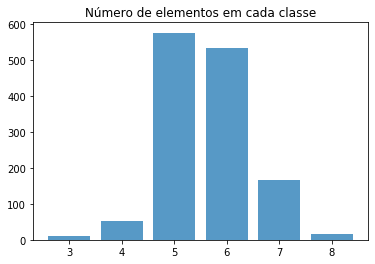

In [8]:
classes = df[df.columns[-2]] # considerando a vari√°vel quality original do dataset
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('N√∫mero de elementos em cada classe')
plt.show(True)

H√° mais vinhos classificados como 5 e 6.

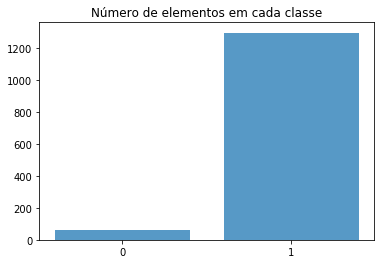

In [9]:
classes = df[df.columns[-1]] # considerando a vari√°vel criada qualidade 1 se maior que 4, 0 caso contrario
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('N√∫mero de elementos em cada classe')
plt.show(True)

Ou seja, h√° mais vinhos classificados como bons. Essa informa√ß√£o ser√° importante na valida√ß√£o cruzada.

An√°lise Descritiva

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality    qualidade  
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252     0.953642  
std       0.155036     0.170667     1.082065     0.823578     0.210336  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     1.000000  
50%       3.310000     0.620000    10.200000     6.000000     1.000000  
75%       3.400000     0.730000    11.100000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

Temos valores muito discrepantes entre as variaveis, vide o maximo da total sulfur dioxide com a density. E, na vari√°vel tamb√©m, vide a total sulfur dioxide novamente. Necessitando de uma normaliza√ß√£o dos dados.
Em m√©dia, a pontua√ß√£o do vinho √© de boa qualidade (considerando acima de 4 bom)
A varia√ß√£o da quality √© muito pequena e a varia√ß√£o do total sulfur dioxide √© uma das maiores.

In [11]:
# convertemos em formato numpy para facilitar a manipulacao dos dados
data = df.to_numpy() # dataframe do pandas para array numpy
nrow,ncol = data.shape # atribuindo aos objetos nrow e ncol o tamanho do conjunto de dados
y = data[:,-1] # separando a variavel target
X = data[:,0:ncol-2] # construindo o dataset de analise sem a variavel target
# retirando a quality para analisar a qualidade como y, variavel target
data = df.copy()
data.drop(['quality'],axis = 1, inplace = True)

print('Dados originais:') # mostrando a m√©dia e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados originais:
Media:  [ 8.31059603  0.52947756  0.2723326   2.52339956  0.08812362 15.8933039
 46.82597498  0.99670895  3.30978661  0.65870493 10.43231543]
Desvio Padrao: [1.73635062e+00 1.82963965e-01 1.95464590e-01 1.35181613e+00
 4.93586925e-02 1.04434258e+01 3.33966517e+01 1.86822940e-03
 1.54979260e-01 1.70604088e-01 1.08166727e+00]


In [ ]:
# normaliza√ß√£o dos dados de forma a evitar problemas de escala nos atributos
scaler = StandardScaler().fit(X) # normaliza√ß√£o dos dados
X = scaler.transform(X) # tranforma√ß√£o dos dados

print('Dados transformados:') # mostrando a m√©dia e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Os dados aqui ficaram numa escala variando de -8 at√© 4 aproximadamente (arredondando). Mas a distancia entre eles ficou menor comparado com o dataset original.

Podemos ter uma ideia da separa√ß√£o entre as classes realizando a proje√ß√£o dos atributos em duas dimens√µes usando PCA.

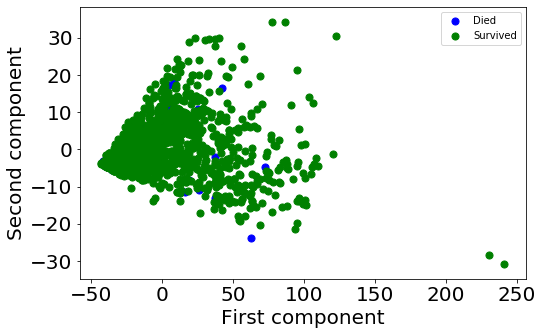

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

Vemos que em duas dimens√µes, a separa√ß√£o n√£o √© clara. Al√©m disso, podemos identificar os atributos que mais explicam a vari√¢ncia nos dados.

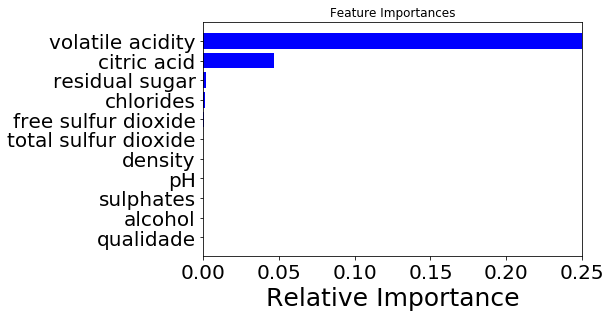

In [16]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = data.columns[1:len(data.iloc[:,0:data.shape[0]-1].columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=25)
plt.xlabel('Relative Importance',fontsize=25)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.xlim([0.0, 0.25])

plt.show()

Ou seja, a classe cujo o vinho √© classificado como bom (maior que 4), est√° intimamente relacionado mais com os atributos volatile acidity, citric acid e residual sugar. Logo, podemos considerar apenas os atributos mais importantes na classifica√ß√£o. No entanto, vamos inicialmente manter esses atributos em nossos dados.

Podemos verificar como a vari√¢ncia muda de acordo com o n√∫mero de componentes.

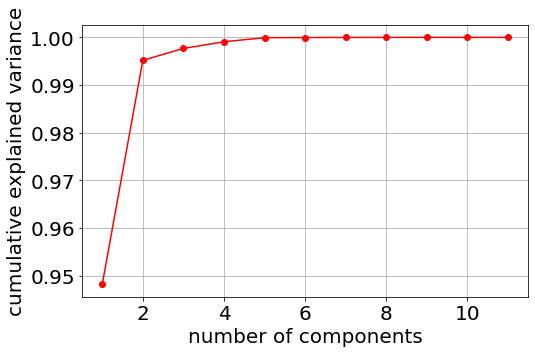

In [18]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

Notamos que com 7 componentes explicamos cerca de 90% dos dados. No entanto, como o n√∫mero de atributos n√£o √© elevado, vamos considerar os dados sem sele√ß√£o dos atributos principais, ou seja, os dados sem usar a proje√ß√£o.

Podemos tamb√©m analisar o n√≠vel de correla√ß√£o nos dados.

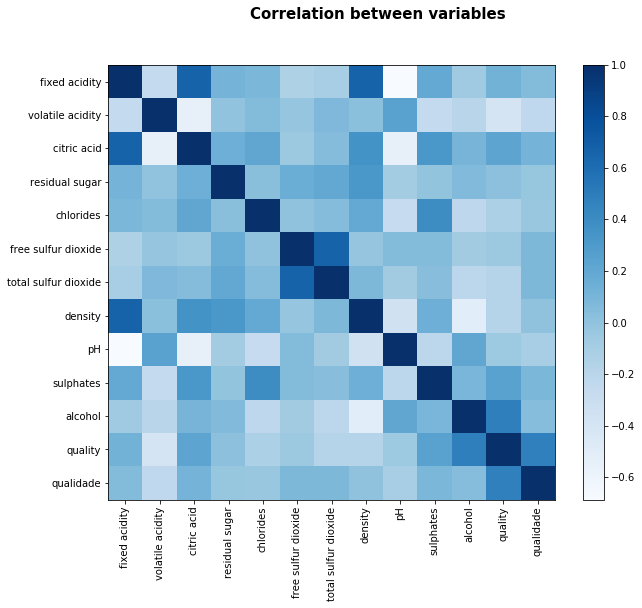

In [19]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Verificamos que as vari√°veis mais correlacionadas s√£o:

volatile acidity x citric acid

density x fixed acidity


3- Transforma√ß√£o para valores num√©ricos (one-hot-encoding) se precisar.

Os dados aqui s√£o todos num√©ricos, n√£o fazendo necess√°ria esta etapa de one-hot-enconding.

In [20]:
# para treinar o classificador, precisamos dividir o dataset em conjunto de teste e de treino

p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42) # dividindo o dataset em teste e treino, de acordo com p que √© a porcentagem de dados que quero ter em cada dataset
# no caso, definimos 0.3 para teste o 0.7 para treino
# A partir desse conjunto de dados, podemos realizar a classifica√ß√£o.

4 - kvizinhos (encontre o melhor k usando valida√ß√£o cruzada)

O primeiro m√©todo usado aqui para classifica√ß√£o ser√° o m√©todo dos vizinhos mais p√≥ximos, ou knn. O knn √© baseado no conceito de dist√¢ncia entre atributos. Para realizar a classifica√ß√£o, vamos usar a biblioteca scikit-learn.

k: 1 accurace: 0.9211184210526314
k: 2 accurace: 0.885372807017544
k: 3 accurace: 0.9463706140350876
k: 4 accurace: 0.9400548245614034
k: 5 accurace: 0.9505811403508773
k: 6 accurace: 0.9463706140350878
k: 7 accurace: 0.9516337719298246
k: 8 accurace: 0.9505811403508773
k: 9 accurace: 0.9526864035087719
k: 10 accurace: 0.9505811403508773
k: 11 accurace: 0.9526864035087719
k: 12 accurace: 0.9526864035087719
k: 13 accurace: 0.9526864035087719
k: 14 accurace: 0.9526864035087719
k: 15 accurace: 0.9526864035087719
k: 16 accurace: 0.9526864035087719
k: 17 accurace: 0.9526864035087719
k: 18 accurace: 0.9526864035087719
k: 19 accurace: 0.9526864035087719


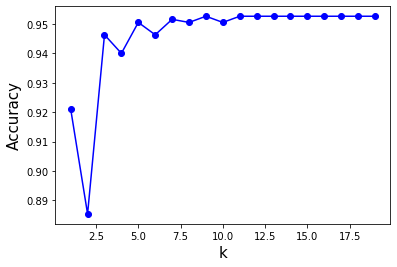

Melhor k: 9


In [29]:
nkf = 10 # n√∫mero de folds
vk = [] # armazena os valores de k, cria√ß√£o de lista nula
vscore = [] # armazena a m√©dia do test score, cria√ß√£o de lista nula
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean') # modelo knn considerando a distancia euclidiana com o argumento metric = 'euclidian'
    cv = cross_validate(model, x_train, y_train, cv=nkf) # realiza a valida√ß√£o cruzada
    print('k:', k, 'accurace:', cv['test_score'].mean()) # mostra a k-√©sima acur√°cia do k-√©simo modelo
    vscore.append(cv['test_score'].mean()) # armazena o resultado numa lista
    vk.append(k) # armazenando o valor de k vizinhos na lista e populando a lista que antes era uma lista nula

plt.plot(vk, vscore, '-bo') # fun√ß√£o de se construir um ambiente para plotar o gr√°fico
plt.xlabel('k', fontsize = 15) # definindo o eixo x
plt.ylabel('Accuracy', fontsize = 15) # definindo o eixo y
plt.show(True) # plotando
best_k = np.argmax(vscore)+1 # mostrando o melhor k com o argumento argmax dentro da lista criada
print('Melhor k:', best_k) # mostrando o resultado

O melhor k foi k=1 com uma acur√°cia de 0.6239480807086614, arrendondando para uma casa decimal, temos acur√°cia igual a 0.6 

5 - √Årvore de decis√£o

In [30]:
# criterio de gini
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101) # Cria o modelo usando o criterio Gini
model.fit(x_train,y_train) # Ajusta o modelo usando os dados de treinamento
y_pred = model.predict(x_test) # realizar a predi√ß√£o
score = accuracy_score(y_pred, y_test) # calcula a acuracia
print('Accuracy:', score) # mostrando a acur√°cia do modelo

Accuracy: 0.9191176470588235


A acur√°cia do modelo de √°rvore de decis√£o considerando o criterio de gini, resultou numa acur√°cia de 0.58125, arredondando, temos uma acur√°cia de 0.6 

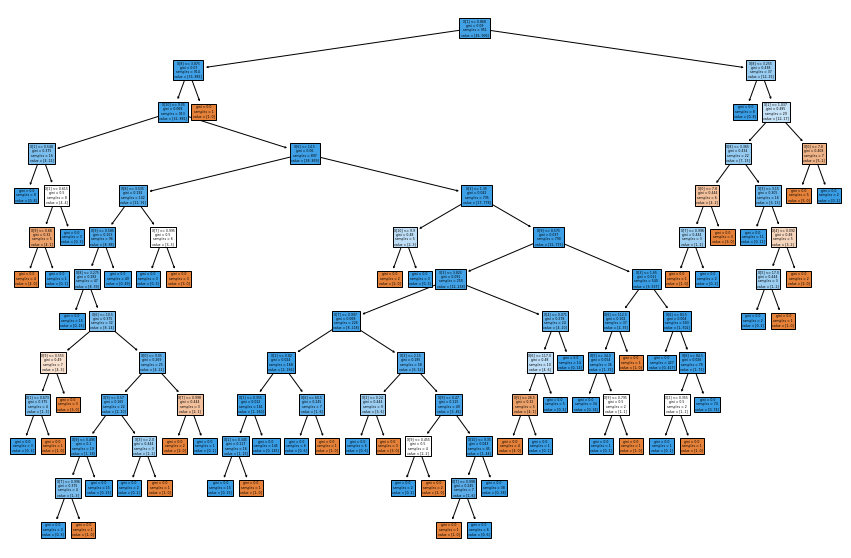

In [31]:
model = model.fit(x_train,y_train) # modelo de arvore de decisao
plt.figure(figsize=(15,10)) # plotando a figura
tree.plot_tree(model, filled = True) # estrutura da figura
plt.show(True)

In [32]:
# usando a medida de entropia
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9411764705882353


A acur√°cia do modelo de √°rvore de decis√£o considerando o criterio de gini, resultou numa acur√°cia de 0.578125, arredondando, temos uma acur√°cia de 0.6 

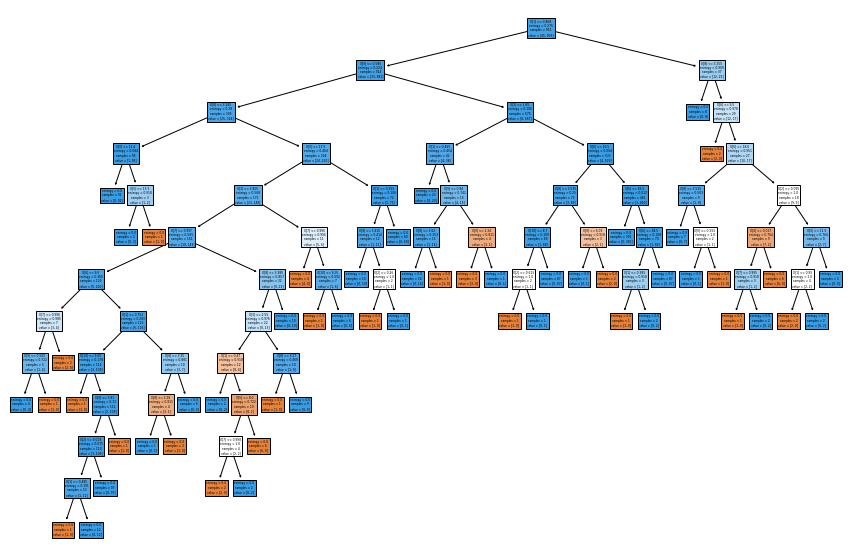

In [33]:
model = model.fit(x_train,y_train) # modelo de arvore de decisao
plt.figure(figsize=(15,10)) # plotando a figura
tree.plot_tree(model, filled = True) # estrutura da figura
plt.show(True)

In [34]:
# limitando o tamanho da arvore
model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 101) # cria o modelo com n√∫mero m√°ximo de n√≠veis max_depth
model.fit(x_train,y_train) # ajusta aos dados de treinamento
y_pred = model.predict(x_test) # faz a predi√ß√£o usando os dados de teste
score = accuracy_score(y_pred, y_test) # calcula a acur√°cia
print('Accuracy:', score) # mostra o resultado

Accuracy: 0.9485294117647058


In [35]:
# limitando o tamanho da arvore
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 101) # cria o modelo com n√∫mero m√°ximo de n√≠veis max_depth
model.fit(x_train,y_train) # ajusta aos dados de treinamento
y_pred = model.predict(x_test) # faz a predi√ß√£o usando os dados de teste
score = accuracy_score(y_pred, y_test) # calcula a acur√°cia
print('Accuracy:', score) # mostra o resultado

Accuracy: 0.9558823529411765


O melhor modelo √© da √°rvore de decis√£o usando o crit√©rio de gini, se considerarmos todas as casas decimais, caso contr√°rio os dois modelos s√£o bons. Limitando os dados, temos um decr√©scimo na acur√°cia considerando tanto o modelo de gini quanto de entropia, ambos cairam para uma acur√°cia de 0.53125, ou 0.5. Utilizando a √°rvore de decis√£o completa, temos que a √°rvore com o crit√©rio de entropia apresenta um distribui√ß√£o maior num ramo s√≥ da √°rvore, enquanto considerando o criterio de gini, a distribui√ß√£o dos ramos s√£o praticamente homogeneas. 

6 - Naive Bayes

No classificador Naive Bayes, podemos assumir que os atributos s√£o normalmente distribu√≠dos.

In [36]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9142156862745098


A acur√°cia do modelo de naive bayes considerando os dados com uma distribui√ß√£o de Normal, resultou numa acur√°cia de 0.5375, arredondando, temos uma acur√°cia de 0.5

Outra maneira de efetuarmos a classifica√ß√£o √© assumirmos que os atributos possuem distribui√ß√£o diferente da normal. Uma possibilidade √© assumirmos que os dados possuem distribui√ß√£o de Bernoulli.

In [37]:
# Usamos a fun√ß√£o BernoulliNB para realizar a classifica√ß√£o usando a distribui√ß√£o de Bernoulli
model = BernoulliNB() # modelo considerando os dados com distribui√ß√£o de bernoulli
model.fit(x_train, y_train) # ajuste dos dados no modelo

y_pred = model.predict(x_test) # calculo da predicao
print('Accuracy: ', model.score(x_test, y_test)) # mostrando a acur√°cia do modelo

Accuracy:  0.9558823529411765


A acur√°cia do modelo de naive bayes considerando os dados com uma distribui√ß√£o de Bernoulli, resultou numa acur√°cia de 0.5645833333333333, arredondando, temos uma acur√°cia de 0.6. Este resultado √© melhor comparado com o outro modelo de naive bayes usando distribui√ß√£o normal.

7 - SVM (encontre o melhor C usando valida√ß√£o cruzada)

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

C: 1 accurace: 0.9558823529411765
C: 2 accurace: 0.9558823529411765
C: 3 accurace: 0.9558823529411765
C: 4 accurace: 0.9558823529411765
C: 5 accurace: 0.9558823529411765
C: 6 accurace: 0.9583333333333334
C: 7 accurace: 0.9534313725490197
C: 8 accurace: 0.9509803921568627
C: 9 accurace: 0.946078431372549
C: 10 accurace: 0.946078431372549
C: 11 accurace: 0.9436274509803921
C: 12 accurace: 0.9436274509803921
C: 13 accurace: 0.9436274509803921
C: 14 accurace: 0.9436274509803921
C: 15 accurace: 0.9411764705882353
C: 16 accurace: 0.9436274509803921
C: 17 accurace: 0.9436274509803921
C: 18 accurace: 0.9436274509803921
C: 19 accurace: 0.9436274509803921


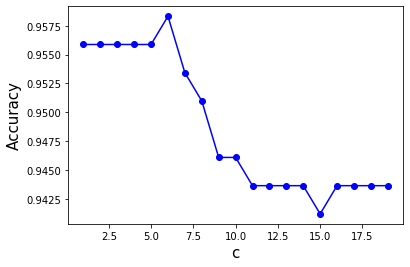

Melhor c: 6


In [39]:
vk = [] # armazena os valores de k, cria√ß√£o de lista nula
vscore = [] # armazena a m√©dia do test score, cria√ß√£o de lista nula
for c in range(1, 20):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    model = SVC(C = c, gamma = 'auto')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('C:', c, 'accurace:', score) # mostra a c-√©sima acur√°cia do c-√©simo modelo
    vscore.append(score) # armazena o resultado numa lista
    vk.append(c) # armazenando o valor de k vizinhos na lista e populando a lista que antes era uma lista nula

plt.plot(vk, vscore, '-bo') # fun√ß√£o de se construir um ambiente para plotar o gr√°fico
plt.xlabel('c', fontsize = 15) # definindo o eixo x
plt.ylabel('Accuracy', fontsize = 15) # definindo o eixo y
plt.show(True) # plotando
best_c = np.argmax(vscore)+1 # mostrando o melhor k com o argumento argmax dentro da lista criada
print('Melhor c:', best_c) # mostrando o resultado

O melhor C foi de 10, C: 10 accurace: 0.625, arredondando a acur√°cia, temos 0.6.

8 - Random Forest (encontre o melhor n√∫mero de estimadores usando valida√ß√£o cruzada)

O m√©todo florestas aleat√≥rias considera amostragem de observa√ß√µes e atributos. Vamos realizar a classifica√ß√£o.

In [40]:
model = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini',
            max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1, 
            min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, verbose=0, warm_start=False) # modelo de random forest

model.fit(x_train,y_train) # ajuste do modelo com as vari√°veis utilizadas

y_pred = model.predict(x_test) # Predict the response for test dataset
score = accuracy_score(y_pred, y_test) # acur√°cia do modelo
print('Accuracy:', score) # mostra a o resultado da acur√°cia do modelo

Accuracy: 0.9558823529411765


A acur√°cia para este modelo foi de 0.6729166666666667, arredondando temos a acur√°cia equivalente a 0.7. Um dos melhores resultados j√° vistos at√© ent√£o.

Podemos analisar como o n√∫mero de √°rvores influencia no resultado.

Number of Estimators: 1 Accuracy: 0.9264705882352942
Number of Estimators: 2 Accuracy: 0.8872549019607843
Number of Estimators: 3 Accuracy: 0.946078431372549
Number of Estimators: 4 Accuracy: 0.9191176470588235
Number of Estimators: 5 Accuracy: 0.9485294117647058
Number of Estimators: 6 Accuracy: 0.9362745098039216
Number of Estimators: 7 Accuracy: 0.9534313725490197
Number of Estimators: 8 Accuracy: 0.9534313725490197
Number of Estimators: 9 Accuracy: 0.9607843137254902
Number of Estimators: 10 Accuracy: 0.9509803921568627
Number of Estimators: 11 Accuracy: 0.9558823529411765
Number of Estimators: 12 Accuracy: 0.9558823529411765
Number of Estimators: 13 Accuracy: 0.9509803921568627
Number of Estimators: 14 Accuracy: 0.9436274509803921
Number of Estimators: 15 Accuracy: 0.9534313725490197
Number of Estimators: 16 Accuracy: 0.9583333333333334
Number of Estimators: 17 Accuracy: 0.9509803921568627
Number of Estimators: 18 Accuracy: 0.9534313725490197
Number of Estimators: 19 Accuracy: 0.9

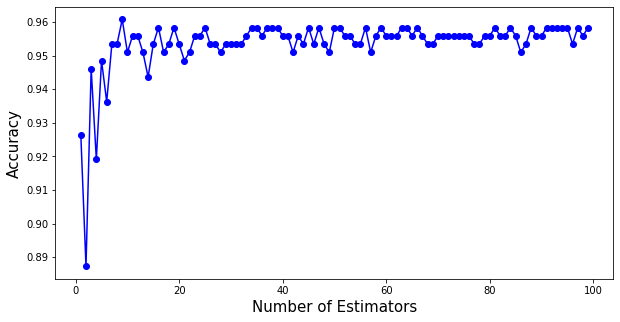

In [41]:
vscore = []
vn = []
for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acur√°cia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()


O melhor n√∫mero de estimadores para o modelo de random forest foi de 56 estimadores com uma acur√°cia cravada em 0.7.

9 - Para o algoritmo random forest, mostre a import√¢ncia de cada atributo.

Accuracy: 0.9485294117647058


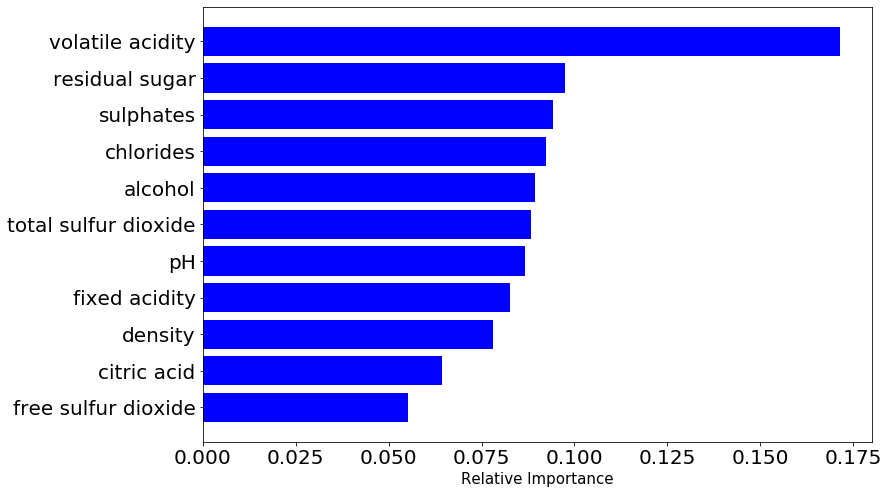

In [42]:
# usando o modelo considerado como o melhor, pela avalia√ß√£o anterior, temos
model = RandomForestClassifier(n_estimators=56, bootstrap=True, criterion='gini',
            max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1, 
            min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, verbose=0, warm_start=False) # modelo de random forest

model.fit(x_train,y_train) # ajuste do modelo com as vari√°veis utilizadas

y_pred = model.predict(x_test) # Predict the response for test dataset
score = accuracy_score(y_pred, y_test) # acur√°cia do modelo
print('Accuracy:', score) # mostra a o resultado da acur√°cia do modelo

importances = model.feature_importances_ # features mais importantes
indices = np.argsort(importances) # os indices de onde estao 
lmeas_order = [] # ordenacao por relevancia das variaveis
for i in indices: # plotagem
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

A vari√°vel que tem a maior import√¢ncia √© alcohol, seguido de sulphates e total sulfur dioxide.
Pesquisando sobre 'como avaliar se um vinho √© bom', h√° um artigo do clube do vinho falando de 3 fatores:√°lcool, acidez e taninos. (link: https://www.clubedosvinhos.com.br/qualidade-de-um-vinho/)
A primeira vari√°vel que se mostrou importante foi realmente o teor alc√≥olico.
A segunda √© o sulfato
Os taninos est√£o ligados a adistringencia, quanto maior quantidade de taninos, os predadores tendem a nao comer a fruta, deixando a fruta intacta e proporcionando um melhor vinho.
E a terceira o total sulfur tem uma rela√ß√£o indireta com o componente taninos, pois quanto mais concentra√ß√£o de taninos,maior a liga√ß√£o de √≠ons livres de SO2 formando este precipitado.
Nota: tem um tabu com rela√ß√£o aos taninos em rela√ß√£o ao gosto.Caso uma pessoa nao goste do gosto do vinho √© adicionado mais taninos artificiais, sem mudar a composi√ß√£o do vinho.

10 - Usando regress√£o linear, tente predizer a porcentagem de √°lcool.

O ajuste dos coeficientes da regress√£o linear √© feito usando apenas o conjunto de treinamento.

In [43]:
random.seed(42) # define a semente (importante para reproduzir os resultados)

dir_file = '/home/andressa/Desktop/' # criando um objeto do meu diretorio do dataset

os.chdir(dir_file) # setando aonde meu dataset est√°
df = pd.read_csv('winequality-red.csv') # importando os dados

print("N√∫mero de linhas e colunas no dataset:", df.shape) # funcao de printar
attributes = list(df.columns) # construindo um objeto tipo lista para armazenar os nomes das variaveis
df.head(10) # funcao head para mostrar uma amostra do dataset

N√∫mero de linhas e colunas no dataset: (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [44]:
alcool = df.alcohol # separando a variavel alcohol do dataset e colocando no final
df.drop(['alcohol'],axis = 1, inplace = True)
df['alcohol'] = alcool
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      quality  alcohol  
0           5      9.4  
1           5      9.8  
2           5      9.8  
3           6      9.8  
4           5      9.4  
...       ...      ...  
1594        5     10.5  
1595        6     11.2  
1596        6     11.0  
1597        5     10.2  
1598        6     11.0  

[1599 rows x 12 columns]

In [45]:
# convertemos em formato numpy para facilitar a manipulacao dos dados
df = df.to_numpy() # dataframe do pandas para array numpy
nrow,ncol = df.shape # atribuindo aos objetos nrow e ncol o tamanho do conjunto de dados
y = df[:,-1] # separando a variavel target
X = df[:,0:ncol-1] # construindo o dataset de analise sem a variavel target

print('Dados originais:') # mostrando a m√©dia e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0)) # m√©dia dos dados
print('Desvio Padrao:', np.std(X, axis = 0)) # desvio padrao dos dados

Dados originais:
Media:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884  5.63602251]
Desvio Padrao: [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 8.07316877e-01]


In [46]:
# normaliza√ß√£o dos dados de forma a evitar problemas de escala nos atributos

scaler = StandardScaler().fit(X) # normaliza√ß√£o dos dados
X = scaler.transform(X) # tranforma√ß√£o dos dados

print('Dados transformados:') # mostrando a m√©dia e desvio padrao dos atributos do conjunto de dados X ja transformados
print('Media: ', np.mean(X, axis = 0)) # media dos dados padronizados
print('Desvio Padrao:', np.std(X, axis = 0)) # desvio padrao dos dados padronizados

Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.82155568e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  8.88733878e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [48]:
lm = LinearRegression() # modelo de regress√£o linear m√∫ltipla
lm.fit(x_train, y_train) # ajuste do modelo de regressao linear multipla

y_pred = lm.predict(x_test) # valores preditos

Notem que como temos v√°rias vari√°veis, n√£o √© poss√≠vel mostrar os resultados em mais de tr√™s dimens√µes. Nesse caso, uma maneira de visualizar a precis√£o na predi√ß√£o √© graficar os valores reais versus as predi√ß√µes, como mostramos abaixo.

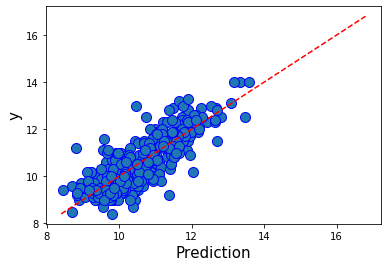

In [49]:
fig = plt.figure() # plotagem
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15) # ajustes dos eixos dos graficos
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)

Quanto mais pr√≥ximo da reta em vermelho, melhor ser√° a predi√ß√£o, pois essa reta representa o caso em que  ùë¶ÃÇ =ùë¶ .

Para quantificarmos o ajuste, calculamos o coeficiente R2.

In [50]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.706569863175307


O modelo de regress√£o linear apresentou um R2 de 0.706569863175307, arredondamos, temos 0.7 de R2.

In [51]:
# percentagem de alcool predita
pd.DataFrame(y_pred).describe()

0
count  480.000000
mean    10.452496
std      0.920253
min      8.459658
25%      9.771493
50%     10.203251
75%     11.123996
max     13.577200

11 - Compare os m√©todos Lasso, Ridge Regression, calculando o erro quadr√°tico m√©dio em fun√ß√£o dos seus par√¢metros (alpha).

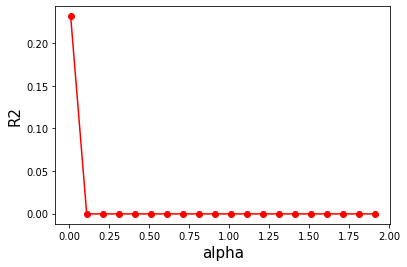

In [53]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

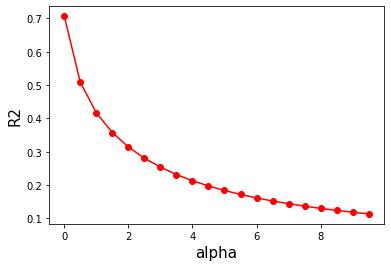

In [54]:
vR2 = []
valpha = []
# variamos os valaores de alpha
for alpha in np.arange(0,10,0.5):
    ridge2 = Ridge(alpha = alpha, normalize = True)
    ridge2.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = ridge2.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

Podemos ver que para o modelo de regressao linear multiplo, obtemos um R2 de 0.7 aproximadamente para para o lasso e ridge os maiores valores, quando alpha √© igual a 0, equiparam-se ao valor obtido no modelo de regressao linear multipla. Em termos computacionais mais se vale usar o modelo de regressao linear multipla do que se gastar processamento com otimizacoes que nao vao dar resultados melhores para a analise

12 - Discuss√£o dos resultados obtidos